In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [76]:
fish = pd.read_csv("./Fish.csv")

### 도미 데이터 산점도

fish["Species"] == "Bream" -> Species 열에서 조건문에 맞는 시리얼반환
* (요소 = boolean)

In [63]:
bream = fish["Species"] == "Bream"
bream_length = fish["Length2"][bream].to_list()
bream_weight = fish["Weight"][bream].to_list()

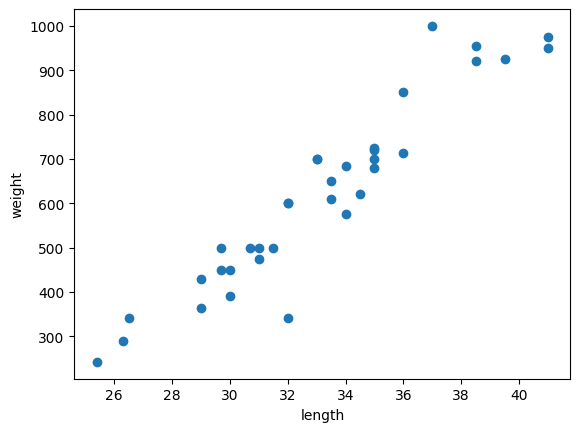

In [64]:
plt.scatter(bream_length, bream_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 빙어 데이터 산점도

In [65]:
smelt = fish["Species"] == "Smelt"
smelt_length = fish["Length2"][smelt].to_list()
smelt_weight = fish["Weight"][smelt].to_list()

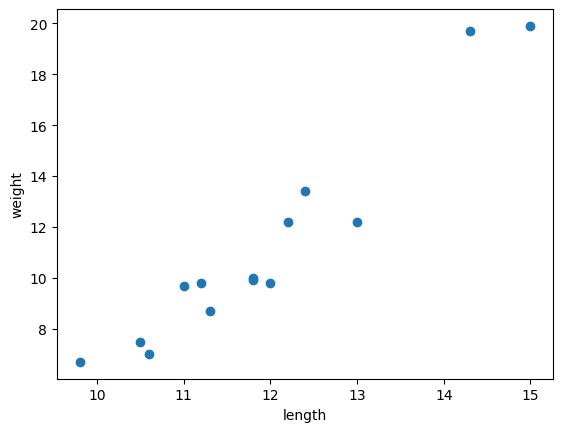

In [66]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 빙어 + 도미

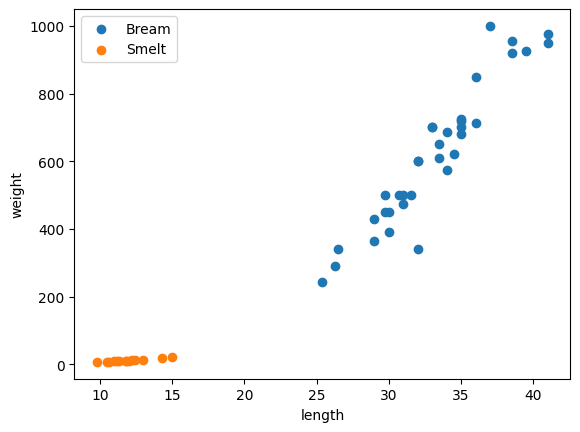

In [67]:
plt.scatter(bream_length, bream_weight, label = "Bream")
plt.scatter(smelt_length, smelt_weight, label = "Smelt")
plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 학습용 데이터 생성

In [71]:
# [n][0] == 길이, [n][1] == 무게
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = np.array([[x, y] for x, y in zip(length, weight)])

# 정답 데이터 1 : 도미, 0 : 빙어
fish_target = [1] * 35 + [0] * 14


####학습   
KNeighborsClassifier는 학습하면 학습 데이터가 저장됨   
학습 데이터가 크면 비효율적

In [75]:
ML = KNeighborsClassifier() # k-최근접 알고리즘
ML.fit(fish_data, fish_target) # 문제와 정답 (지도 학습)

ML.score(fish_data, fish_target)

1.0

In [89]:
res = [ML.predict([[30, 400]])[0], ML.predict([[12, 12]])[0], ML.predict([[90, 1200]])[0], ML.predict([[11, 6]])[0], ML.predict([[20, 400]])[0], ML.predict([[13, 200]])[0]]
for idx, i in enumerate(res):
  ans = "도미"
  if not i: ans = "빙어"
  print(f"res[{idx}]는 {ans}일듯" )

res[0]는 도미일듯
res[1]는 빙어일듯
res[2]는 도미일듯
res[3]는 빙어일듯
res[4]는 도미일듯
res[5]는 도미일듯
